In [24]:
# 🧠 Brain Tumor MRI Classification – Preprocessing & Data Analysis

## Pre processing Steps
### 1. read images and create labels
# 2. normalize pixel values
# 3. better contraste
# 4. flatten images
# 5. save arrays
# 6. generate graphs
# 7. statistics

# The goal is to prepare clean, normalized data for supervised learning models  
# **(Linear Regression, Logistic Regression, SVM, and Neural Networks)**.

# Dataset source: **[Kaggle - Brain Tumor MRI Dataset]**(https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset)

In [25]:
!pip install opencv-python

import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

print(f"OpenCV version: {cv2.__version__}")

OpenCV version: 4.12.0


In [26]:
IMG_SIZE=128
def load_images(base_path):
    data, labels = [], []
    for label_name in ['tumor', 'notumor']:
        folder = os.path.join(base_path, label_name)
        label = 1 if label_name == 'tumor' else 0
        for filename in os.listdir(folder):
            if filename.endswith('.jpg'):
                img_path = os.path.join(folder, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                img = img / 255.0
                img = cv2.equalizeHist((img * 255).astype('uint8')) / 255.0  
                data.append(img)
                labels.append(label)
    
    data, labels = shuffle(np.array(data), np.array(labels), random_state=42)
    return data, labels

In [27]:
dataset="../dataset/"
X_train_full, y_train_full = load_images(os.path.join(dataset, "Training"))
X_test, y_test = load_images(os.path.join(dataset, "Testing"))

print(f"Original Training set: {X_train_full.shape}")
print(f"Test set: {X_test.shape}")

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full,
    test_size=0.15,  # 15% para validation
    random_state=42,
    stratify=y_train_full  # Mantém proporção de classes
)

print("\n" + "="*60)
print("DATA SPLIT SUMMARY")
print("="*60)
print(f"Training set:   {X_train.shape[0]:4d} samples ({X_train.shape[0]/X_train_full.shape[0]*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]:4d} samples ({X_val.shape[0]/X_train_full.shape[0]*100:.1f}%)")
print(f"Test set:       {X_test.shape[0]:4d} samples")
print(f"Total:          {X_train.shape[0] + X_val.shape[0] + X_test.shape[0]:4d} samples")

Original Training set: (5521, 128, 128)
Test set: (1205, 128, 128)

DATA SPLIT SUMMARY
Training set:   4692 samples (85.0%)
Validation set:  829 samples (15.0%)
Test set:       1205 samples
Total:          6726 samples


In [28]:
# Verificar distribuição de classes
print("\nClass distribution:")
print(f"  Train:      {np.bincount(y_train)}")
print(f"  Validation: {np.bincount(y_val)}")
print(f"  Test:       {np.bincount(y_test)}")

# ===== FLATTEN DATA =====
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print("\nFlattened shapes:")
print(f"  Train: {X_train_flat.shape}")
print(f"  Val:   {X_val_flat.shape}")
print(f"  Test:  {X_test_flat.shape}")

#save values as numpy array to later be processed through the models
np.savez_compressed("brain_mri_preprocessed.npz", 
                    X_train=X_train_flat, 
                    y_train=y_train,
                    X_val=X_val_flat,
                    y_val=y_val,
                    X_test=X_test_flat,
                    y_test=y_test)

#see transformed data
unique, counts = np.unique(y_train, return_counts=True)
print(f"""
Dataset Statistics
------------------
Data type:          {X_train.dtype}
Value range:        [{X_train.min():.3f}, {X_train.max():.3f}]
Image size:         {IMG_SIZE}x{IMG_SIZE}
Flattened features: {X_train_flat.shape[1]}
Class distribution: {dict(zip(unique, counts))}
""")


Class distribution:
  Train:      [1208 3484]
  Validation: [214 615]
  Test:       [309 896]

Flattened shapes:
  Train: (4692, 16384)
  Val:   (829, 16384)
  Test:  (1205, 16384)

Dataset Statistics
------------------
Data type:          float64
Value range:        [0.000, 1.000]
Image size:         128x128
Flattened features: 16384
Class distribution: {np.int64(0): np.int64(1208), np.int64(1): np.int64(3484)}



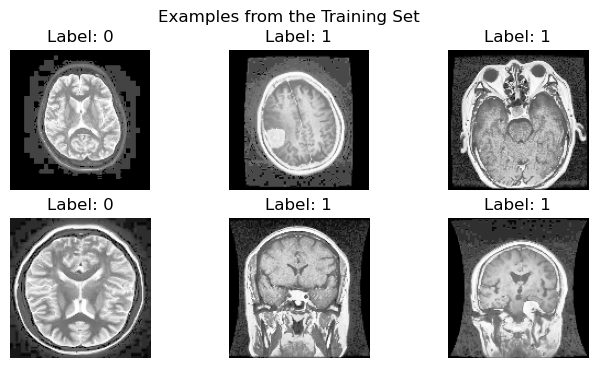

In [29]:
plt.figure(figsize=(8,4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Examples from the Training Set")
plt.show()

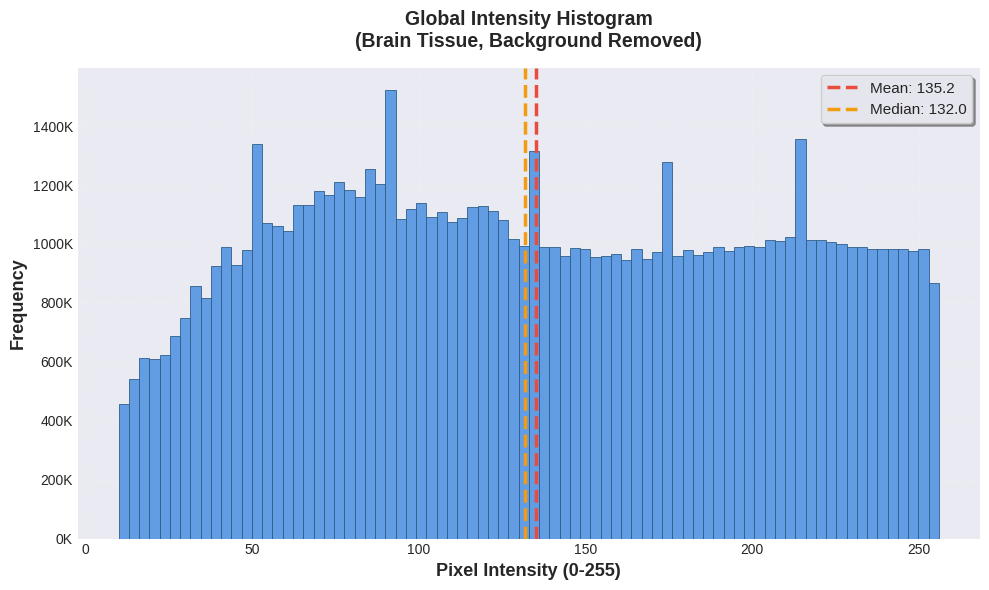

In [30]:
# Preparar dados
all_pixels = np.concatenate([X_train.flatten(), X_test.flatten()])
if all_pixels.max() <= 1.0:
    all_pixels = all_pixels * 255
all_pixels = all_pixels[all_pixels > 10]

# Estatísticas
mean_val = all_pixels.mean()
median_val = np.median(all_pixels)
std_val = all_pixels.std()

# Plot com estilo mais profissional
plt.style.use('seaborn-v0_8-darkgrid')  # Ou 'seaborn-v0_8-whitegrid'
fig, ax = plt.subplots(figsize=(10, 6))

# Histograma
n, bins, patches = ax.hist(all_pixels, bins=80, range=(10, 256),
                            color='#4A90E2', edgecolor='#2E5C8A',
                            alpha=0.85, linewidth=0.7)

# Média e Mediana
ax.axvline(mean_val, color='#E74C3C', linestyle='--', linewidth=2.5,
           label=f'Mean: {mean_val:.1f}', zorder=5)
ax.axvline(median_val, color='#F39C12', linestyle='--', linewidth=2.5,
           label=f'Median: {median_val:.1f}', zorder=5)

# Labels
ax.set_xlabel('Pixel Intensity (0-255)', fontsize=13, fontweight='600')
ax.set_ylabel('Frequency', fontsize=13, fontweight='600')
ax.set_title('Global Intensity Histogram\n(Brain Tissue, Background Removed)',
             fontsize=14, fontweight='700', pad=15)

# Legenda
ax.legend(fontsize=11, loc='upper right', frameon=True, 
          fancybox=True, shadow=True, framealpha=0.95)

# Grid
ax.grid(True, alpha=0.3, linestyle=':', linewidth=0.8)

# Formatar eixo Y (com K para milhares)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}K'))

plt.tight_layout()
plt.savefig('intensity_histogram.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

# Reset style
plt.style.use('default')

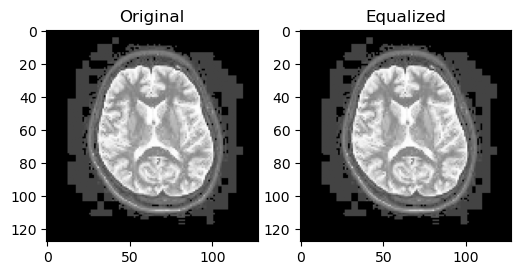

In [31]:
import cv2

original = (X_train[0] * 255).astype('uint8')
equalized = cv2.equalizeHist(original)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(original, cmap='gray')
plt.title("Original")
plt.subplot(1,2,2)
plt.imshow(equalized, cmap='gray')
plt.title("Equalized")
plt.show()

In [32]:
print("Training mean:", X_train.mean(), "Training std deviation:", X_train.std())
print("Testing mean:", X_test.mean(), "Testing std deviation:", X_test.std())

Training mean: 0.4445335076365925 Training std deviation: 0.3116499859089348
Testing mean: 0.44049170668737536 Testing std deviation: 0.3130427019111071


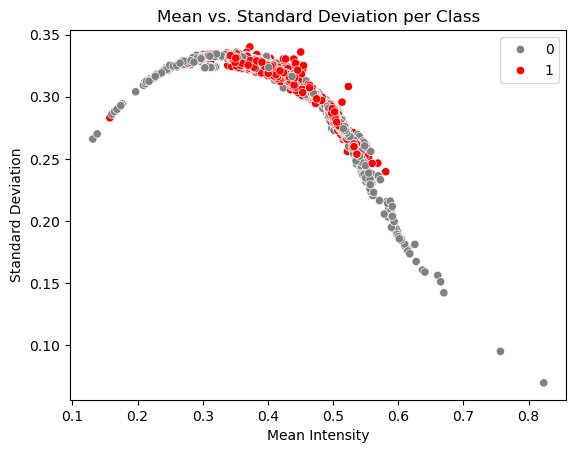

In [33]:
means = X_train.mean(axis=(1,2))
stds = X_train.std(axis=(1,2))
sns.scatterplot(x=means, y=stds, hue=y_train, palette=['gray','red'])
plt.title("Mean vs. Standard Deviation per Class")
plt.xlabel("Mean Intensity")
plt.ylabel("Standard Deviation")
plt.show()

In [34]:
means_train = X_train.mean(axis=(1, 2))
stds_train  = X_train.std(axis=(1, 2))

# DataFrame com as features e o label
df = pd.DataFrame({
    "mean_intensity": means_train,
    "std_deviation": stds_train,
    "label": y_train
})

print(df.head())
print("Shape do df:", df.shape)

   mean_intensity  std_deviation  label
0        0.303764       0.323562      0
1        0.388156       0.322555      1
2        0.473213       0.301856      1
3        0.509302       0.280017      0
4        0.467984       0.304384      1
Shape do df: (4692, 3)


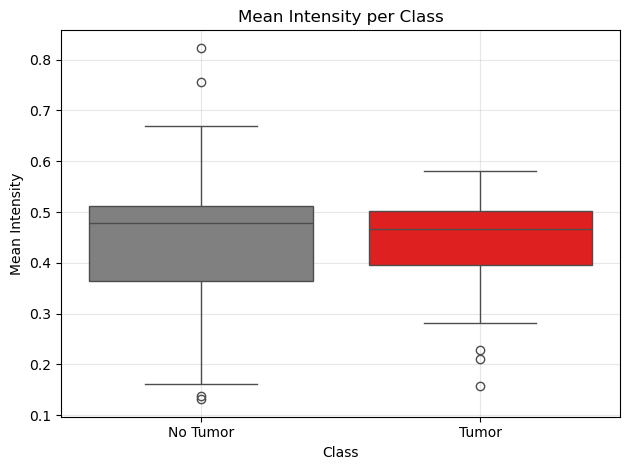

In [35]:
sns.boxplot(data=df, x="label", y="mean_intensity", hue="label", palette=['gray', 'red'], legend=False)
plt.xticks([0,1], ["No Tumor", "Tumor"])
plt.title("Mean Intensity per Class", fontsize=12)
plt.xlabel("Class")
plt.ylabel("Mean Intensity")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

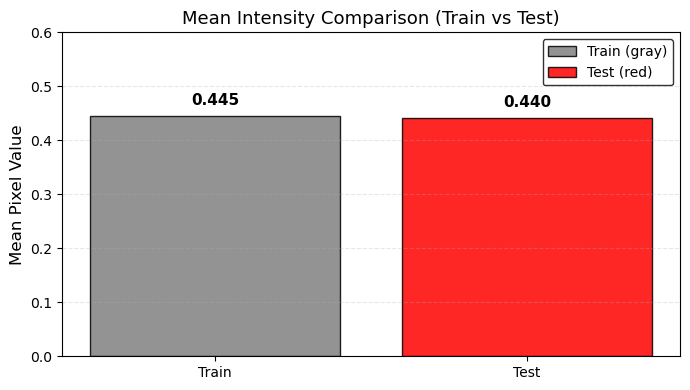

In [39]:
plt.figure(figsize=(7, 4))

# média por imagem
means_train = X_train.mean(axis=(1, 2))
means_test  = X_test.mean(axis=(1, 2))

# média global (um valor por conjunto)
mean_train_global = means_train.mean()
mean_test_global  = means_test.mean()

labels = ['Train', 'Test']
values = [mean_train_global, mean_test_global]
colors = ['gray', 'red']

# barras
bars = plt.bar(labels, values,
               color=colors,
               alpha=0.85,
               edgecolor='black')

# título e eixos
plt.title("Mean Intensity Comparison (Train vs Test)", fontsize=13)
plt.ylabel("Mean Pixel Value", fontsize=12)
plt.ylim(0, 0.6)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# adicionar valores numéricos
for i, v in enumerate(values):
    plt.text(i, v + 0.015, f'{v:.3f}',
             ha='center', va='bottom',
             fontsize=11, fontweight='bold')

# legenda correta
plt.legend(bars, ['Train (gray)', 'Test (red)'],
           loc='upper right', frameon=True,
           facecolor='white', edgecolor='black')

plt.tight_layout()
plt.show()

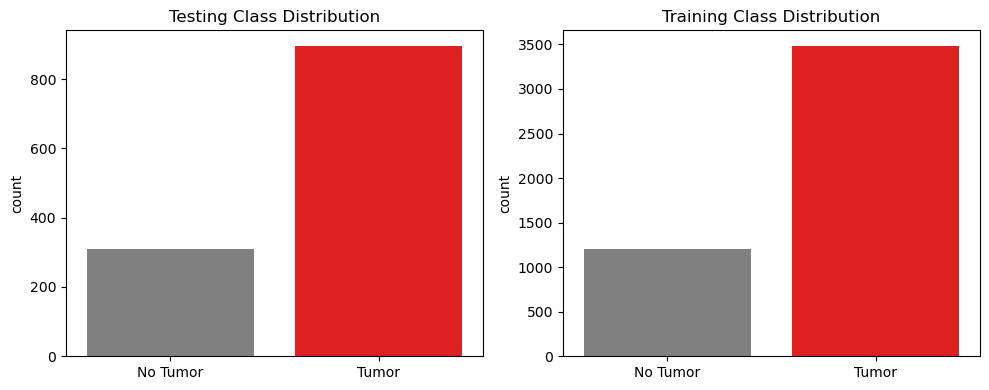

In [40]:
#Subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# --- Test set ---
sns.countplot(ax=axes[0], x=y_test, palette=['gray', 'red'], hue=y_test, legend=False)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No Tumor', 'Tumor'])
axes[0].set_title("Testing Class Distribution")

# --- Train set ---
sns.countplot(ax=axes[1], x=y_train, palette=['gray', 'red'], hue=y_train, legend=False)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No Tumor', 'Tumor'])
axes[1].set_title("Training Class Distribution")

# Adjust layout
plt.tight_layout()
plt.show()

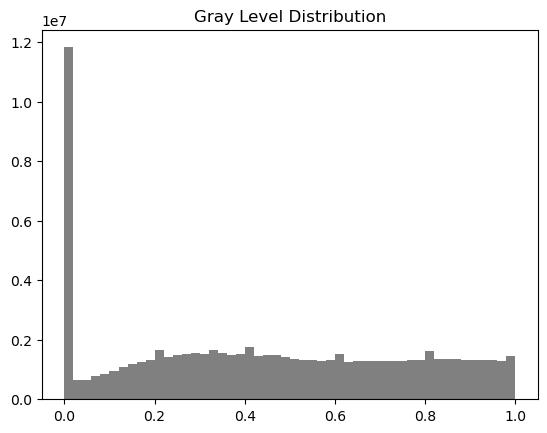

In [41]:
plt.hist(X_train.ravel(), bins=50, color='gray')
plt.title("Gray Level Distribution")
plt.show()

In [ ]:
print(f"""
Dataset Summary
----------------
Training samples: {X_train.shape[0]}
Testing samples:  {X_test.shape[0]}
Total samples:    {X_train.shape[0] + X_test.shape[0]}
Image size:       {IMG_SIZE}x{IMG_SIZE}
Classes:          Tumor (1), No Tumor (0)
Mean intensity:   {X_train.mean():.3f}
Std deviation:    {X_train.std():.3f}
""")

In [ ]:
##To test the models use
##data = np.load("brain_mri_preprocessed.npz")
##X_train, y_train = data["X_train"], data["y_train"]
##X_test, y_test = data["X_test"], data["y_test"]